In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as asc
from sklearn import model_selection
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


<AxesSubplot:>

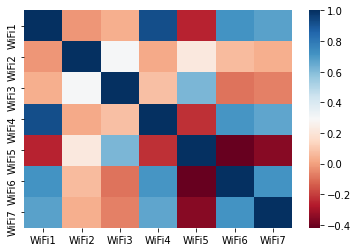

In [2]:
#Importing data from csv file
data = pd.read_csv("proj1.csv")
features = data.drop(["Room"],axis=1)

#Finding the correlation between features
corr = features.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [6]:
data.shape

(2000, 8)

In [5]:
# Checking for missing values
data.isnull().sum()

WiFi1    200
WiFi2    200
WiFi3    200
WiFi4    200
WiFi5    200
WiFi6    200
WiFi7    200
Room       0
dtype: int64

# Imputing using decision tree

In [14]:
Xt = data.drop(["Room"],axis=1)
imp = IterativeImputer(estimator =  DecisionTreeRegressor(max_features='sqrt', random_state=42),max_iter=100, random_state=0)
imp.fit(Xt)
df = pd.DataFrame(imp.transform(Xt), columns = features.columns)
df["Room"] = data.Room
y = data.Room
df.isnull().sum()

C:\Users\prajual pillai\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


WiFi1    0
WiFi2    0
WiFi3    0
WiFi4    0
WiFi5    0
WiFi6    0
WiFi7    0
Room     0
dtype: int64

In [18]:
X=df.iloc[:,:-1].values
y=df.iloc[:,7].values
y = label_binarize(y, classes=[1,2,3,4])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

# Classification using Decision Tree

# Tuning Decision Tree by changing parameters

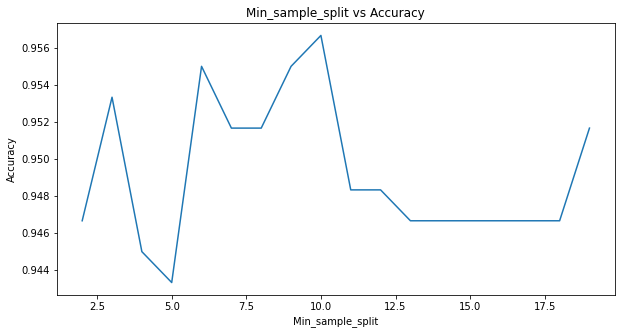

  split vs Accuracy
[[ 2.          0.94666667]
 [ 3.          0.95333333]
 [ 4.          0.945     ]
 [ 5.          0.94333333]
 [ 6.          0.955     ]
 [ 7.          0.95166667]
 [ 8.          0.95166667]
 [ 9.          0.955     ]
 [10.          0.95666667]
 [11.          0.94833333]
 [12.          0.94833333]
 [13.          0.94666667]
 [14.          0.94666667]
 [15.          0.94666667]
 [16.          0.94666667]
 [17.          0.94666667]
 [18.          0.94666667]
 [19.          0.95166667]]


In [20]:
# By changing the min_sample_split
acu1 = []
splits =[]
for i in range(2,20):
    # Create Decision Tree classifer object
    clf_dt1 = DecisionTreeClassifier(criterion="gini", min_samples_split=i)

    # Train Decision Tree Classifer
    clf_dt1 = clf_dt1.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt1.predict(X_test)
    splits.append(i)
    acu1.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize = (10,5))
plt.plot(splits,acu1)
plt.xlabel("Min_sample_split")
plt.ylabel("Accuracy")
plt.title("Min_sample_split vs Accuracy")
plt.show()

a = np.asmatrix(splits)
b = np.asmatrix(acu1)
output = np.stack((a,b))
print('  split vs Accuracy')
print(output.transpose())

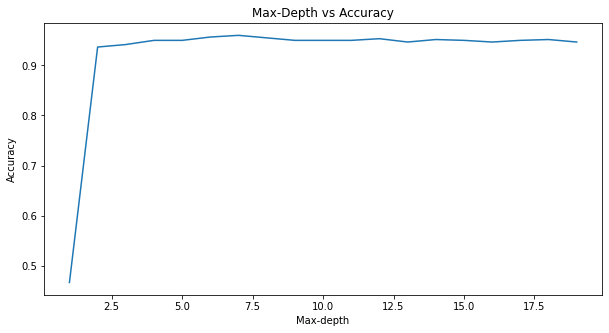

  Depth vs Accuracy
[[ 1.          0.46666667]
 [ 2.          0.93666667]
 [ 3.          0.94166667]
 [ 4.          0.95      ]
 [ 5.          0.95      ]
 [ 6.          0.95666667]
 [ 7.          0.96      ]
 [ 8.          0.955     ]
 [ 9.          0.95      ]
 [10.          0.95      ]
 [11.          0.95      ]
 [12.          0.95333333]
 [13.          0.94666667]
 [14.          0.95166667]
 [15.          0.95      ]
 [16.          0.94666667]
 [17.          0.95      ]
 [18.          0.95166667]
 [19.          0.94666667]]


In [21]:
#By changing the max_depth
acu2 = []
dep =[]
for i in range(1,20):
    # Create Decision Tree classifer object
    clf_dt2 = DecisionTreeClassifier(criterion="gini", max_depth=i)

    # Train Decision Tree Classifer
    clf_dt2 = clf_dt2.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf_dt2.predict(X_test)
    dep.append(i)
    acu2.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize = (10,5))
plt.plot(dep,acu2)
plt.xlabel("Max-depth")
plt.ylabel("Accuracy")
plt.title("Max-Depth vs Accuracy")
plt.show()

a = np.asmatrix(dep)
b = np.asmatrix(acu2)
output = np.stack((a,b))
print('  Depth vs Accuracy')
print(output.transpose())

# Selecting best model

In [23]:
if max(acu2)>max(acu1):
    i = acu2.index(max(acu2))
    clf = DecisionTreeClassifier(criterion = 'gini', max_depth = dep[i])
    clf_dt = clf.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)
else:
    i = acu1.index(max(acu1))
    clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split = splits[i])
    clf_dt = clf.fit(X_train,y_train)
    #Predicting results using testing data
    y_pred_dt = clf_dt.predict(X_test)

#Creating confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_dt.argmax(axis=1))
#Printing accuracy
print(f"Accuracy: {asc(y_pred_dt, y_test)}")
print(("\nConfusion Matrix:"))
print(cm)

Accuracy: 0.9566666666666667

Confusion Matrix:
[[137   0   1   4]
 [  0 148   9   0]
 [  1   3 137   5]
 [  1   0   2 152]]


# ROC and AUC for Decision Tree

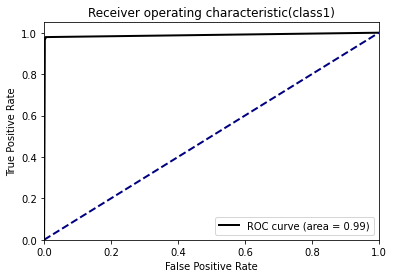

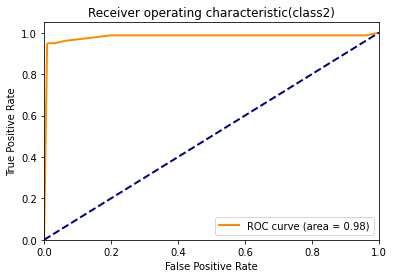

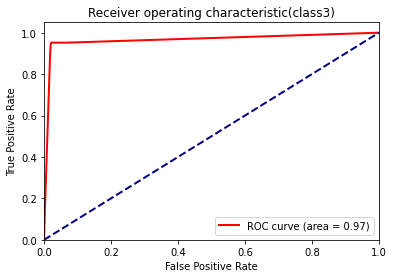

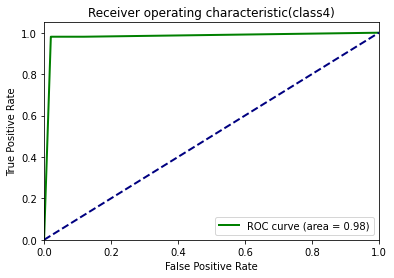

In [27]:
from sklearn.metrics import roc_curve, auc
classifier = OneVsRestClassifier(clf_dt)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#plotting ROC curve and AUC
plt.figure()
lw = 2
for i in range(4):
    color = ['k','darkorange','r','g']
    plt.plot(fpr[i], tpr[i], color=color[i],
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic(class{i+1})')
    plt.legend(loc="lower right")
    plt.show()